In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('weatherAUS.csv')

# About Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.shape

(145460, 23)

## Preview dataset

In [5]:
#
df.sample(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
101429,2014-05-29,MountGambier,7.1,18.5,1.4,1.0,8.9,N,28.0,NNE,...,90.0,66.0,1023.4,1022.3,2.0,3.0,12.0,17.4,Yes,No
73201,2016-12-07,Mildura,10.2,31.8,0.4,5.4,12.6,NNE,46.0,NE,...,44.0,25.0,1016.1,1011.5,0.0,NaN,19.4,30.1,No,Yes
80189,2015-04-09,Watsonia,7.2,19.7,0.0,1.6,7.9,SE,30.0,S,...,84.0,43.0,1026.4,1024.2,5.0,5.0,13.4,18.9,No,No
89748,2016-02-20,Cairns,24.1,34.0,0.0,4.8,11.5,NNE,33.0,SE,...,64.0,71.0,1013.3,1009.5,1.0,1.0,31.0,32.4,No,No
2160,2015-01-28,Albury,16.6,27.5,0.0,NaN,NaN,SSE,50.0,SE,...,53.0,34.0,1013.9,1012.2,3.0,2.0,20.7,26.2,No,No


## View column names

In [6]:
col_name = df.columns
col_name

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

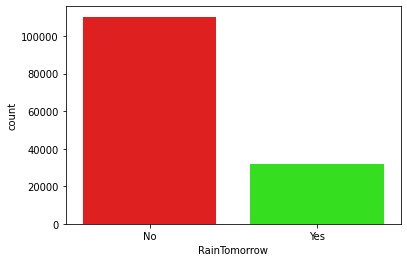

In [7]:
# The label of training data is rain tomorrow column
cols= ["#FF0000","#1CFF00"]
sns.countplot(x= df["RainTomorrow"], palette= cols)

## View correlation of variated columns

<AxesSubplot:>

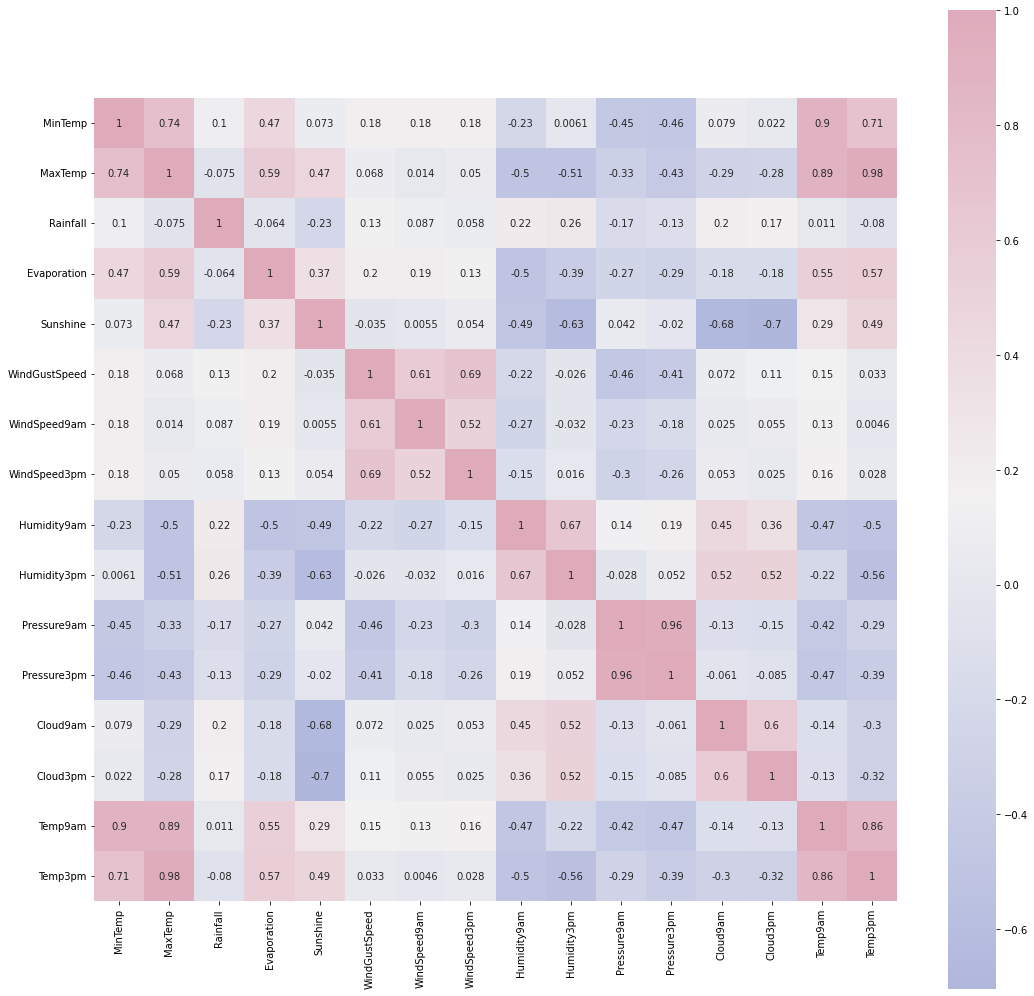

In [8]:
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

## View statistical properties of dataset 

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Preview output column data

# Data Preprocessing

In [10]:
lengths = df["Date"].str.len()
lengths.value_counts()

10    145460
Name: Date, dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Year'] = df.Date.dt.year

## Categorical variables

In [12]:
s = (df.dtypes == "object")
object_cols = list(s[s].index)

print("Categotical variables: ")
print(object_cols)

Categotical variables: 
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [13]:
# Missing values in categorical variables
for i in object_cols:
    print(i, df[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [14]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
55866,2011-01-04,Ballarat,8.3,23.4,0.0,NaN,NaN,SE,48.0,SE,...,1009.4,1.0,NaN,13.2,21.7,No,No,1,4,2011
128518,2013-11-14,Walpole,15.3,20.2,1.0,NaN,NaN,ESE,52.0,ESE,...,1020.2,NaN,NaN,17.1,18.2,No,No,11,14,2013
69362,2014-08-30,Melbourne,11.2,21.4,0.0,1.0,10.0,N,41.0,NNE,...,1021.5,NaN,NaN,12.1,20.5,No,No,8,30,2014
85821,2013-09-16,Brisbane,17.7,21.8,0.0,5.0,0.0,NE,35.0,NaN,...,1012.1,8.0,8.0,19.3,20.3,No,Yes,9,16,2013
108852,2009-09-08,Albany,7.5,18.1,15.0,4.4,10.6,NaN,NaN,NW,...,1016.7,1.0,1.0,11.0,17.6,Yes,No,9,8,2009


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Text(0.5, 0, 'Days In Year')

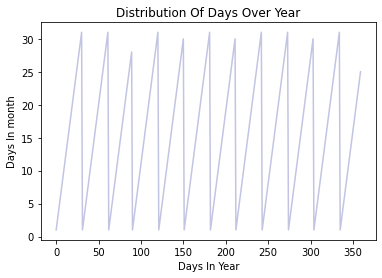

In [16]:
# roughly a year's span section 
section = df[:360] 
tm = section["Day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

In [17]:
#There don't seem to be any error in dates so parsing values into datetime
df['Date']= pd.to_datetime(df["Date"])
#Creating a collumn of year
df['year'] = df.Date.dt.year

# function to encode datetime into cyclic parameters. 
#As I am planning to use this df in a neural network I prefer the months and days in a cyclic continuous feature. 

def encode(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

df['month'] = df.Date.dt.month
df = encode(df, 'month', 12)

df['day'] = df.Date.dt.day
df = encode(df, 'day', 31)

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Month,Day,Year,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,12,1,2008,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,12,2,2008,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,12,3,2008,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,12,4,2008,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,12,5,2008,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


As expected, the "year" attribute of data repeats. However in this for the true cyclic nature is not presented in a continuous manner. Splitting months and days into Sine and cosine combination provides the cyclical continuous feature. This can be used as input features to ANN.

Text(0.5, 0, 'Sine Encoded Months')

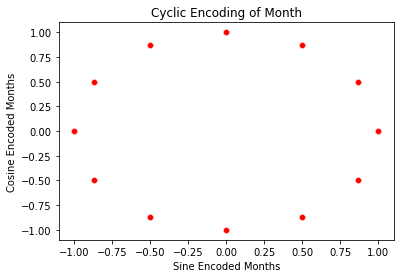

In [18]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=df, color="#FF0000")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

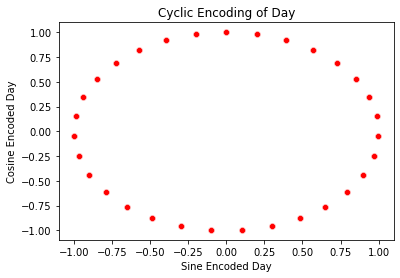

In [19]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=df, color="#FF0000")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")